> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis

#### 1. Do movies that have higher budgets make more revenue?

#### 2. Is higher revenue associated with popularity?

#### 3. What are the overall top 20 most produced genre?

#### 4. What is the highest year of production?

>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

### Let's begin by reading our data

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.shape

(10866, 21)

##### Finding out the rows with missing values

In [5]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

 ##### Dropping the none needed columns

In [6]:
df.drop(['imdb_id', 'homepage', 'cast', 'tagline','keywords','overview'], axis = 1, inplace= True) 
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


##### Dropping rows with null values 


In [7]:
df.dropna(axis = 0,inplace= True)

##### Checking if the rows with missing values have been dropped

In [8]:
print(df.shape)
df.isna().sum()

(9807, 15)


id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

##### Observe the data set 

In [9]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9807.000000,9807.000000,9.807000e+03,9.807000e+03,9807.000000,9807.000000,9807.000000,9807.000000,9.807000e+03,9.807000e+03
mean,63285.502906,0.693133,1.612666e+07,4.407345e+07,102.743245,238.609463,5.966361,2000.891200,1.935178e+07,5.684958e+07
std,90804.092475,1.035473,3.216685e+07,1.223983e+08,28.133335,602.052173,0.914297,13.032032,3.562014e+07,1.512176e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10248.000000,0.231585,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,18726.000000,0.418900,1.457860e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,2.423044e+05,0.000000e+00
75%,70586.500000,0.774204,1.900000e+07,3.063954e+07,112.000000,172.000000,6.600000,2011.000000,2.442295e+07,4.254888e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 15 columns):
id                      9807 non-null int64
popularity              9807 non-null float64
budget                  9807 non-null int64
revenue                 9807 non-null int64
original_title          9807 non-null object
director                9807 non-null object
runtime                 9807 non-null int64
genres                  9807 non-null object
production_companies    9807 non-null object
release_date            9807 non-null object
vote_count              9807 non-null int64
vote_average            9807 non-null float64
release_year            9807 non-null int64
budget_adj              9807 non-null float64
revenue_adj             9807 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.2+ MB


##### checking for duplicates 

In [11]:
df.duplicated().sum()

1

##### Dropping duplicates

In [12]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

##### Plotting a histogrsm of the whole dataset to make observations

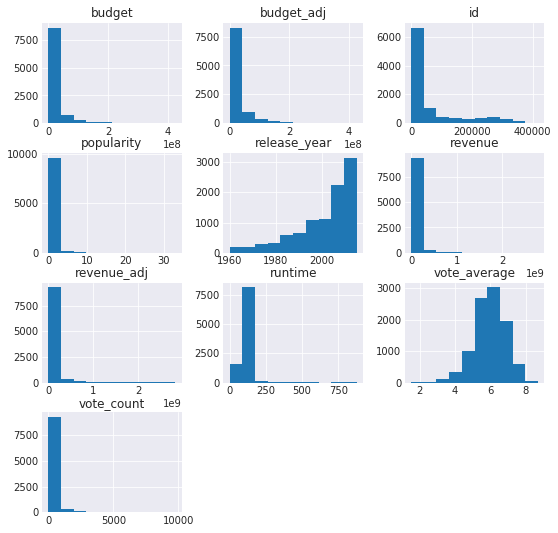

In [13]:
df.hist(figsize = (9,9));

#### We are done cleaning our data!!!

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Do movies that have higher budgets make more revenue?)

In [14]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

##### Group revenue and budget by id 

In [15]:
df_1 = df.groupby('id')['budget', 'revenue'].mean()
df_1.head()

,budget,revenue
id,,
5,4000000,4300000
6,0,12136938
11,11000000,775398007
12,94000000,864625978
13,55000000,677945399


##### Get the mean of budget

In [16]:
print(df.budget.mean())

16125246.91495003


##### Get revenues with high budgets 

In [17]:
high_budget = df_1.query('budget >= 16125246.91495003')
high_budget.head()

,budget,revenue
id,,
12,94000000,864625978
13,55000000,677945399
18,90000000,263920180
22,140000000,655011224
24,30000000,180949000


##### Get revenues with low budgets

In [18]:
low_budget = df_1.query('budget <= 16125246.91495003')
low_budget.head()

,budget,revenue
id,,
5,4000000,4300000
6,0,12136938
11,11000000,775398007
14,15000000,356296601
16,12800000,40031879


##### Make a  scatter plot to see correlation between revenue and low and high budgets

In [19]:
def scatter_plot(m1, m2):
    m1.plot(x= 'budget', y= 'revenue', color= 'yellow', kind = 'scatter' );
    plt.title(m2, fontsize = 15);

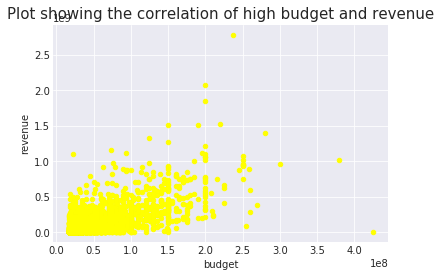

In [20]:
scatter_plot(high_budget,'Plot showing the correlation of high budget and revenue');

**Reasoning:** There is a positive correlation between high budget and revenue

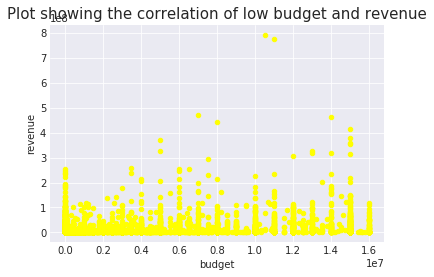

In [21]:
scatter_plot(low_budget, 'Plot showing the correlation of low budget and revenue');

**Reasoning:** There is no correlation between low budget and revenue

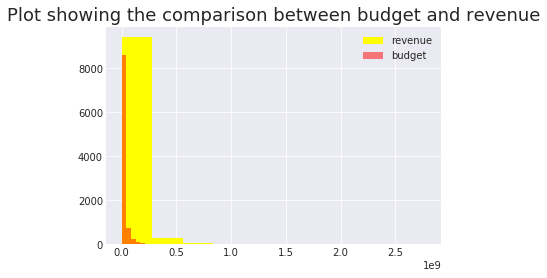

In [22]:
df.revenue.hist(color= 'yellow', label = 'revenue');
plt.title('Plot showing the comparison between budget and revenue', fontsize = 18);
df.budget.hist(color= 'red', label= 'budget', alpha = 0.5);
plt.legend();

**Reasoning:** Higher budgets appear to be making more revenue

### Research Question 2  (Is higher revenue associated with popularity?)

In [23]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


##### Group popularity by revenue

In [24]:
df_2 = df.groupby('revenue')['popularity'].mean()
df_2.head()

revenue
0    0.346776
2    0.507350
3    0.359301
5    0.393743
6    0.316621
Name: popularity, dtype: float64

##### get the popularity mean

In [25]:
print(df.popularity.mean())

0.6931433187844176


##### Plot a graph of revenue and popularity

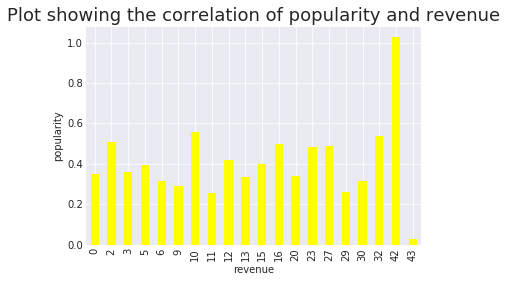

In [26]:
df_2.head(20).plot(color= 'yellow', kind = 'bar' );
plt.title('Plot showing the correlation of popularity and revenue', fontsize = 18);
plt.xlabel('revenue');
plt.ylabel('popularity');

**Reasoning:** There is no correlation between popularity and revenue

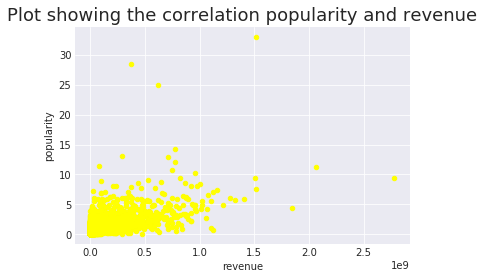

In [27]:
df.plot(y= 'popularity', x= 'revenue', color= 'yellow', kind = 'scatter' );
plt.title('Plot showing the correlation popularity and revenue', fontsize = 18);

**Reasoning:** No correlation between revenue and popularity

### Research Question 3  (What are the overall top 20 most produced genre?)

##### Get the value counts of the genres

In [28]:
highest_genres = df.genres.value_counts()
highest_genres.head()

Drama             638
Comedy            615
Drama|Romance     272
Comedy|Drama      255
Comedy|Romance    248
Name: genres, dtype: int64

##### Plot a bar graph 

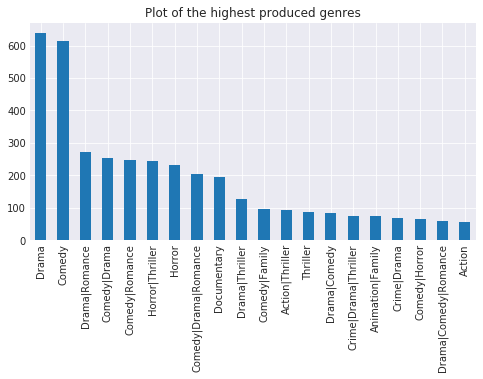

In [29]:
highest_genres.head(20).plot(kind = 'bar', title= 'Plot of the highest produced genres', figsize = (8,4));

**Reasoning:** Drama is the most produced genre

### Research Question 4  (What is the highest year of production?)

##### Get the value count of the release years

In [30]:
highest_release_year = df.release_year.value_counts()
highest_release_year.head(10)

2014    638
2013    568
2015    561
2012    500
2009    474
2011    461
2008    443
2010    421
2007    392
2006    353
Name: release_year, dtype: int64

##### Print out the year with the highest production

In [31]:
highest_release_year.head(1)

2014    638
Name: release_year, dtype: int64

##### Plot a bar graph

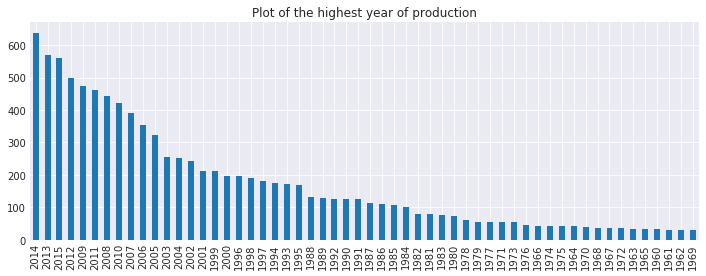

In [32]:
highest_release_year.plot(kind = 'bar', title= 'Plot of the highest year of production', figsize = (12,4));

**Reasoning:** 2014 is the year with the highest production

### Conclusion

#### Q1 Do movies that have higher budgets make more revenue?

From the visualization and the analysis of the avaliable data, we can see that there is a positive relationship between high revenue and budgets. This shows that more often than not, movies that are produced with higher budgets end up making higher revenues.

#### Q2 Is higher revenue associated with popularity?

Looking at popularity, the data and visualization shows that there is no correlation between popularity and revenue. When a movies makes better revenue, it has no association with its popularity.



#### Q3 What are the overall top 20 most produced genre?

The overall most produced genre according to the provided data is **Drama**



#### Q4 What is the highest year of production?
The year with the highest produced movies according to the provided data is **2014**

### Limitations

**Q1**
The limitation to this analysis is my visualization. If i had done my histogram visualization just higher budgets and the respective revenue generated, it would have been an easier way to visualize the connection between revenue and budget. Since the data to be displayed will be fewer and hence the visualization will be more explicit.

**Q2**
The limitation to this analysis is the approach i took. If i had done my visualization using histograms of popularity on revenue, it would have been a better way to identify the link between revenue and popularity.

**Q3**

The limitation here is that i could have split the genres individually to get the value counts of each individual genres for better accuracy.

**Q4**
The limitation here is that the data contains no information on the day production was completed. If we had acess to that information then the analysis would be more accurate. This is because the release year could possibly be different from the production year.

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0